In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Read the dataset using the corrected file path
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')
# Display the dataset
data.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [ ]:
# Summary statistics for numerical columns
data.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [ ]:
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


(24123, 12)

In [ ]:
data.nunique()

timestamp            3587
X                    2885
Y                   16693
Speed                8137
Heading             18620
AgentCount            819
Density               819
Acc                  1215
LevelOfCrowdness        5
label                   2
label2                  2
Severity_level          4
dtype: int64

In [ ]:
data.isnull().sum()
# print((data.isnull().sum()/(len(data)))*100)

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

**Missing Values**

In [ ]:
missing_values = data.isnull().sum()
missing_values

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

In [ ]:
mean_acc = data['Acc'].mean()
data['Acc'].fillna(mean_acc, inplace=True)
missing_values_after_imputation = data.isnull().sum()
print(missing_values_after_imputation)

timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
dtype: int64


**Outliers**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
numerical_features = ['X', 'Y', 'Speed', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']
# Fit the model and predict outliers
data['outlier_lof'] = lof.fit_predict(data[numerical_features])
outliers_lof = data[data['outlier_lof'] == -1]
print(f"Outliers detected using LOF: {len(outliers_lof)}")


Outliers detected using LOF: 242


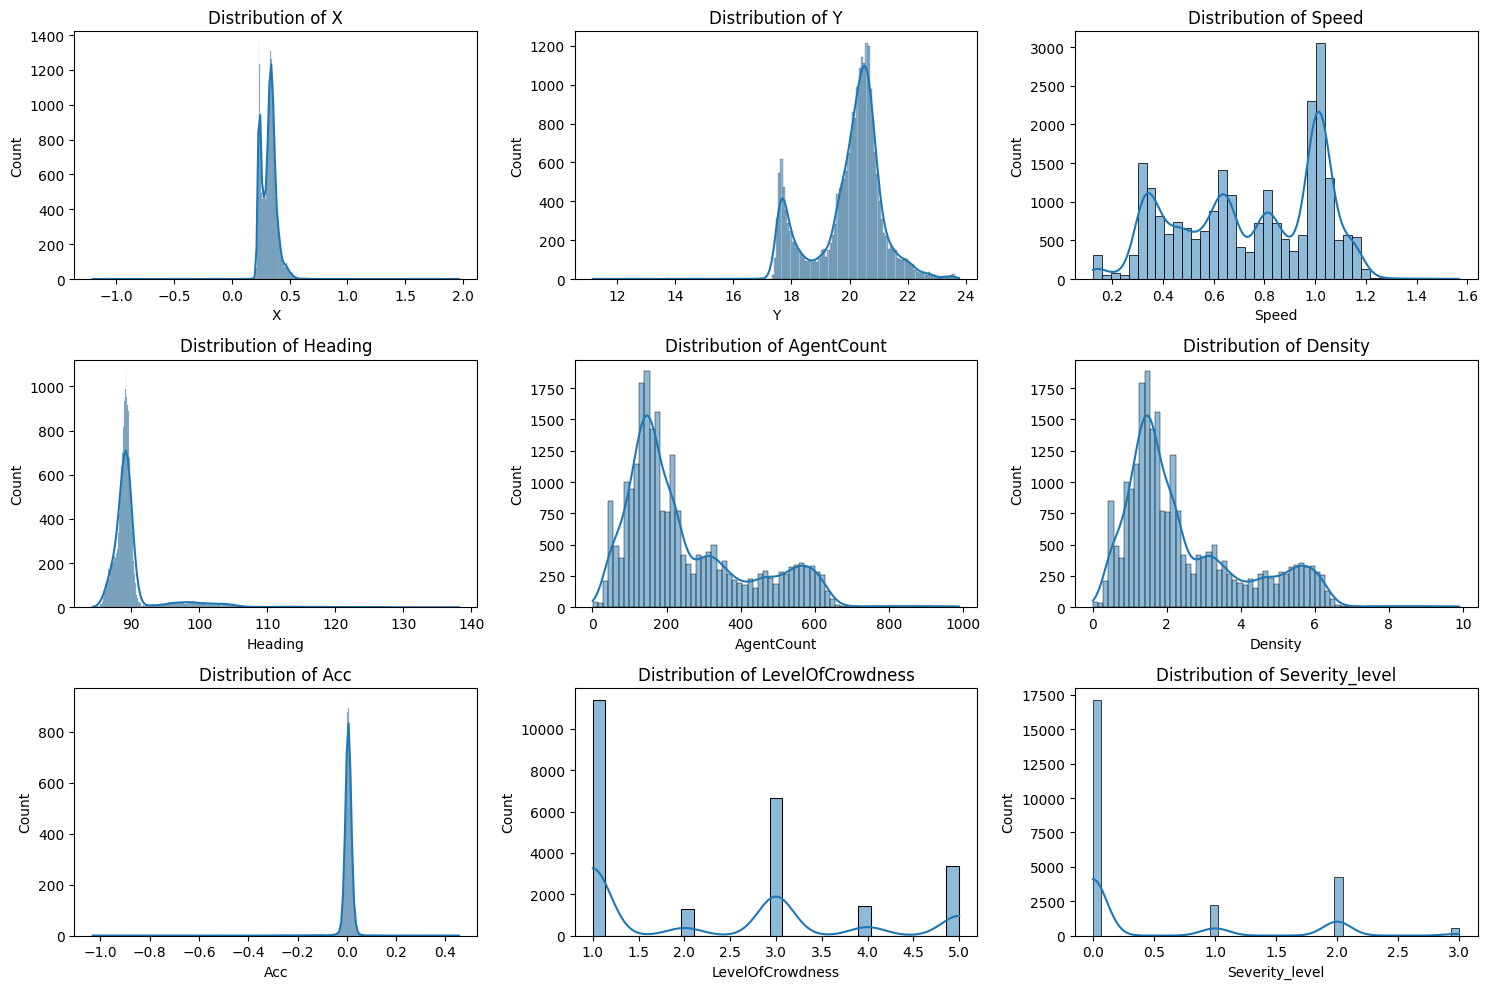

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot distributions for key numerical variables
key_columns = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']
for i, column in enumerate(key_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


**IQR**

In [ ]:
data.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level,outlier_lof
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265,0.979936
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032458,1.456331,0.453297,0.857201,0.199316
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000,-1.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000,1.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006200,2.000000,0.000000,0.000000,1.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000,1.000000


IQR Values:
{'X': 0.0923}

Outliers:
280
      timestamp       X        Y   Speed   Heading  AgentCount  Density  \
2884    0:53:40  0.5134  21.2985  0.7035  102.0650         283     2.83   
2885    0:53:41  0.5183  21.4306  0.7333  103.5605         281     2.81   
2886    0:53:42  0.5083  21.4887  0.7637  105.3477         278     2.78   
2887    0:53:43  0.5070  21.6273  0.8043  106.4613         274     2.74   
4150    0:59:07  0.5301  20.2118  1.0353   91.0069          49     0.49   
...         ...     ...      ...     ...       ...         ...      ...   
16710   0:00:22  0.6000  16.2390  1.4521   90.6531           9     0.09   
16711   0:00:23  0.7257  16.4256  1.4208   89.4937          11     0.11   
16713   0:00:25  0.5652  16.8410  1.3910   90.4042          16     0.16   
16821   0:02:13  0.5021  21.3055  1.0841   89.8225          45     0.45   
16900   0:03:32  0.5273  21.1877  1.1483   90.4889          53     0.53   

          Acc  LevelOfCrowdness  label   label2  Severity_

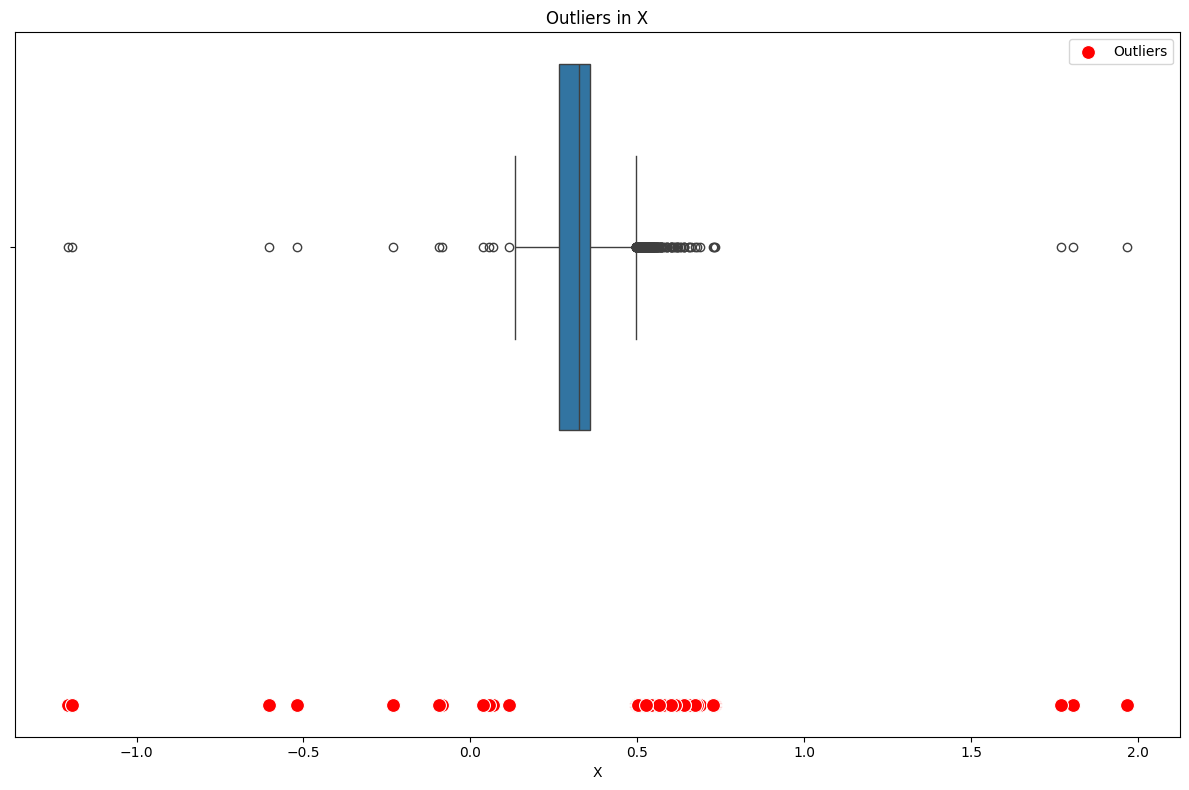

In [ ]:
# List of sensor reading columns
sensor_columns = ['X']  # Update this list based on your actual sensor reading columns

# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

IQR Values:
{'Y': 1.1172000000000004}

Outliers:
3004
      timestamp       X        Y   Speed  Heading  AgentCount  Density  \
1719    0:34:15  0.2314  17.8719  0.3453  87.4521         509     5.09   
1720    0:34:16  0.2295  17.8558  0.3355  86.9938         510     5.10   
1729    0:34:25  0.2429  17.8711  0.3345  87.9196         519     5.19   
1731    0:34:27  0.2342  17.8566  0.3380  87.5961         524     5.24   
1733    0:34:29  0.2443  17.8939  0.3311  86.9780         525     5.25   
...         ...     ...      ...     ...      ...         ...      ...   
23084   0:41:56  0.2490  17.8727  0.3875  87.1785         483     4.83   
23085   0:41:57  0.2441  17.8590  0.3915  87.9671         480     4.80   
23086   0:41:58  0.2398  17.8562  0.3955  87.8023         483     4.83   
23107   0:42:19  0.2485  17.8408  0.4224  87.3489         459     4.59   
23108   0:42:20  0.2472  17.8950  0.4364  87.8707         459     4.59   

          Acc  LevelOfCrowdness  label   label2  Severity

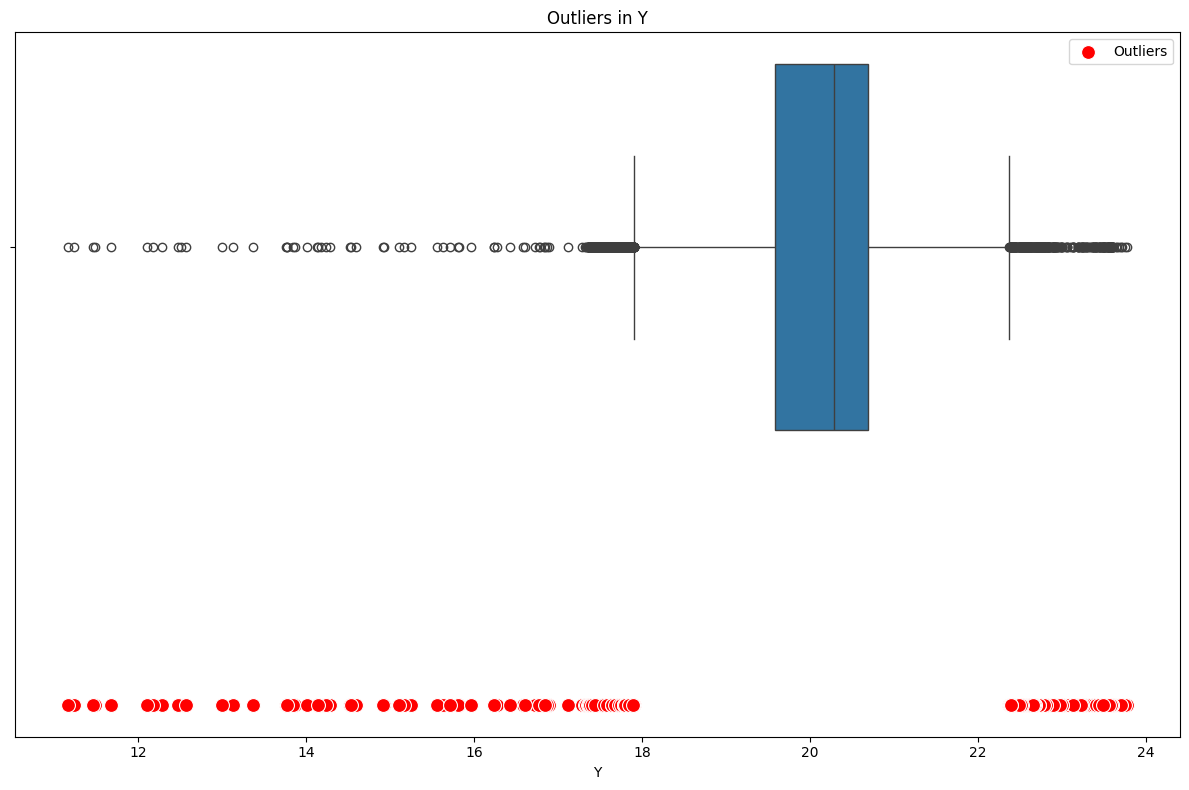

In [ ]:
# List of sensor reading columns
sensor_columns = ['Y']

# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()


IQR Values:
{'Speed': 0.5092000000000001}

Outliers:
0
Empty DataFrame
Columns: [timestamp, X, Y, Speed, Heading, AgentCount, Density, Acc, LevelOfCrowdness, label, label2, Severity_level, outlier_lof]
Index: []


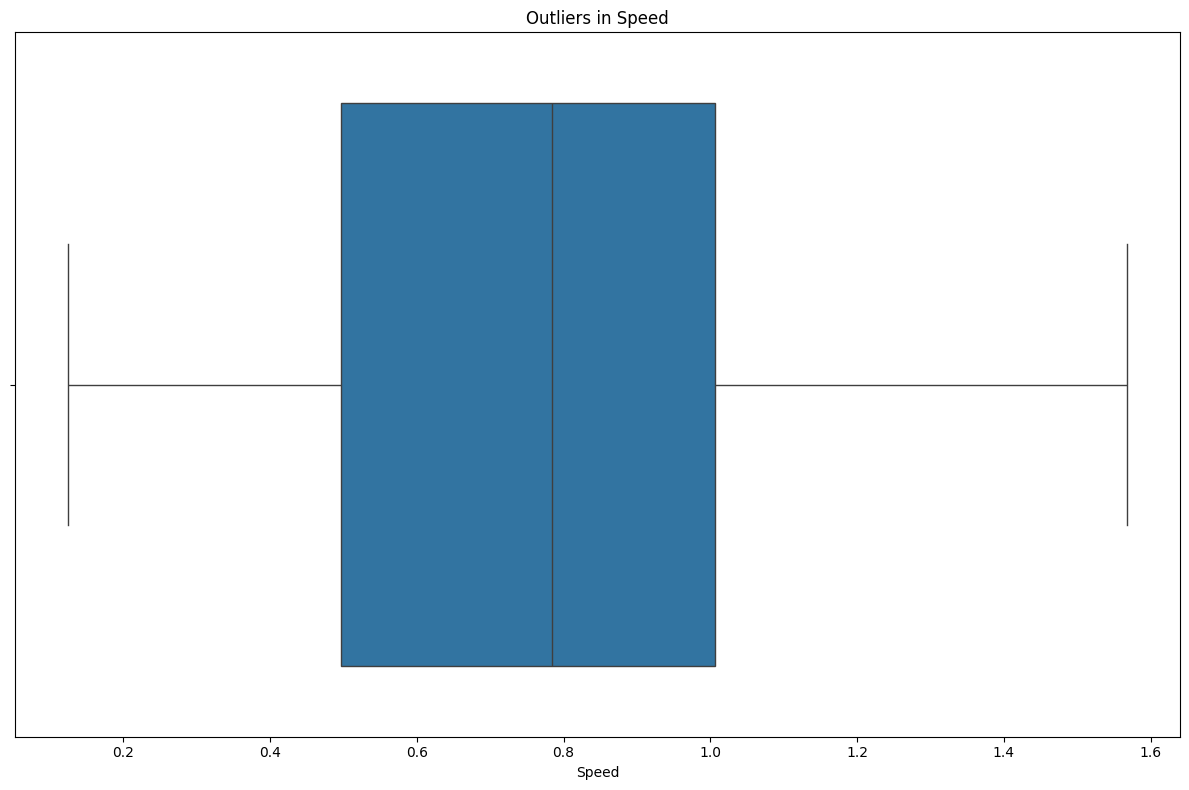

In [ ]:
# List of sensor reading columns
sensor_columns = ['Speed']

# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

IQR Values:
{'Heading': 1.3221499999999935}

Outliers:
3461
      timestamp       X        Y   Speed  Heading  AgentCount  Density  \
1279    0:26:55  0.3217  19.3262  0.5203  92.3444         233     2.33   
1421    0:29:17  0.2529  19.7438  0.4777  86.3473         334     3.34   
1422    0:29:18  0.2655  19.7065  0.4736  86.4754         332     3.32   
1503    0:30:39  0.2485  19.3132  0.4333  86.4520         372     3.72   
1505    0:30:41  0.2525  19.4052  0.4179  86.3024         373     3.73   
...         ...     ...      ...     ...      ...         ...      ...   
23032   0:41:04  0.2282  17.8689  0.3740  86.3509         510     5.10   
23033   0:41:05  0.2205  17.8110  0.3673  86.1579         511     5.11   
23034   0:41:06  0.2225  17.8313  0.3700  86.1503         509     5.09   
23083   0:41:55  0.2418  17.8679  0.4046  86.1618         481     4.81   
23119   0:42:31  0.2502  18.2235  0.4310  85.9236         459     4.59   

          Acc  LevelOfCrowdness  label   label2  Se

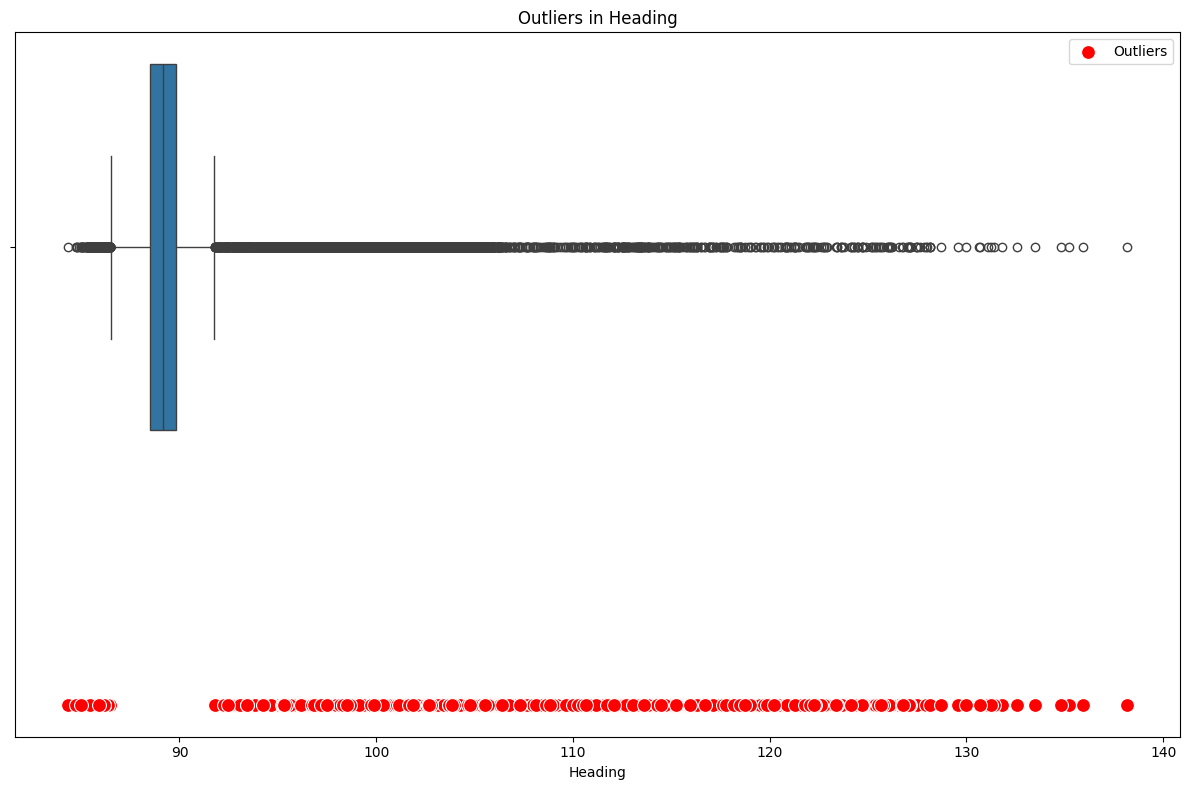

In [ ]:
sensor_columns = ['Heading']
# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

IQR Values:
{'AgentCount': 202.0}

Outliers:
284
      timestamp       X        Y   Speed   Heading  AgentCount  Density  \
14782   0:37:21  0.2257  17.6054  0.2927   86.8057         641     6.41   
14785   0:37:24  0.2317  17.5431  0.2944   86.1967         642     6.42   
14793   0:37:32  0.2445  17.4699  0.2877   86.2804         640     6.40   
14794   0:37:33  0.2321  17.4633  0.2803   86.9579         641     6.41   
14795   0:37:34  0.2343  17.4788  0.2789   87.3341         643     6.43   
...         ...     ...      ...     ...       ...         ...      ...   
22423   0:59:55  0.2476  20.7841  0.1411  128.1307         986     9.86   
22424   0:59:56  0.2464  20.8038  0.1388  128.6967         986     9.86   
22425   0:59:57  0.2477  20.7936  0.1405  126.7505         989     9.89   
22426   0:59:58  0.2465  20.7839  0.1420  125.6554         990     9.90   
22427   0:59:59  0.2458  20.7864  0.1422  124.1256         990     9.90   

          Acc  LevelOfCrowdness  label   label2  S

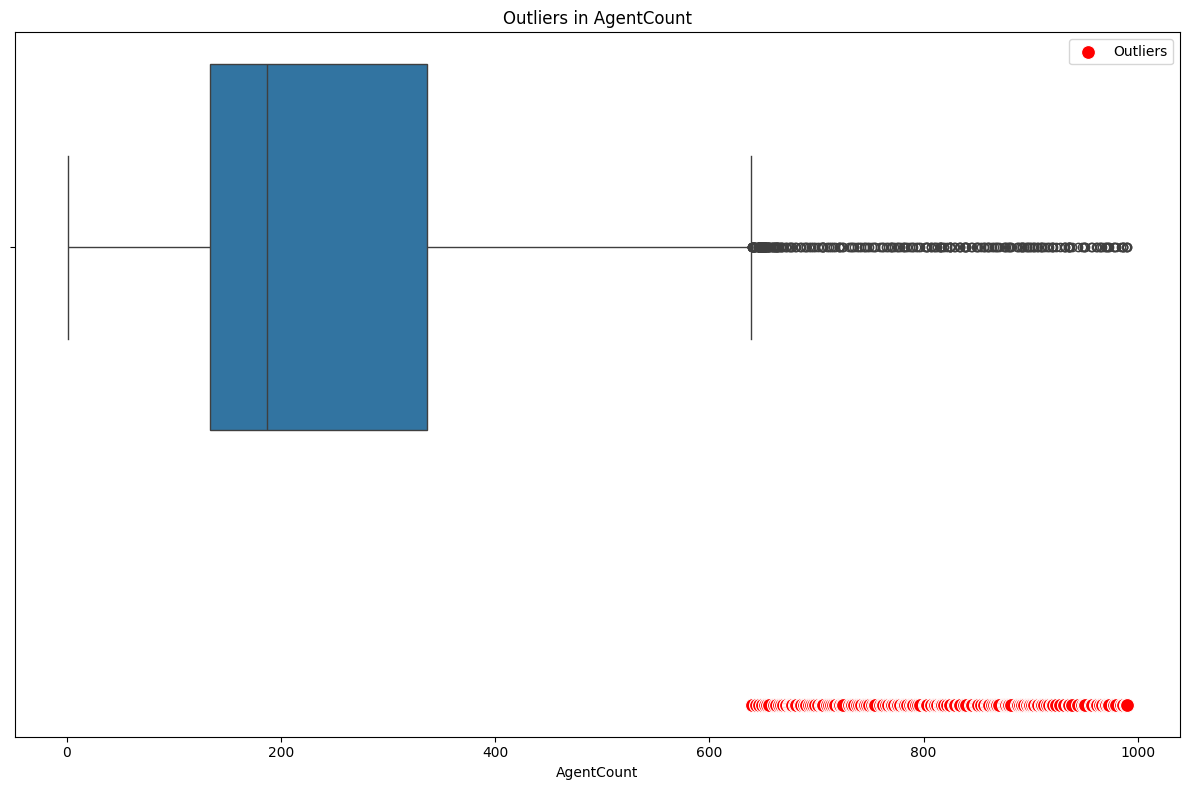

In [ ]:
sensor_columns = ['AgentCount']

# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

IQR Values:
{'Density': 2.0199999999999996}

Outliers:
286
      timestamp       X        Y   Speed   Heading  AgentCount  Density  \
14782   0:37:21  0.2257  17.6054  0.2927   86.8057         641     6.41   
14783   0:37:22  0.2252  17.5493  0.2961   86.9792         639     6.39   
14785   0:37:24  0.2317  17.5431  0.2944   86.1967         642     6.42   
14793   0:37:32  0.2445  17.4699  0.2877   86.2804         640     6.40   
14794   0:37:33  0.2321  17.4633  0.2803   86.9579         641     6.41   
...         ...     ...      ...     ...       ...         ...      ...   
22423   0:59:55  0.2476  20.7841  0.1411  128.1307         986     9.86   
22424   0:59:56  0.2464  20.8038  0.1388  128.6967         986     9.86   
22425   0:59:57  0.2477  20.7936  0.1405  126.7505         989     9.89   
22426   0:59:58  0.2465  20.7839  0.1420  125.6554         990     9.90   
22427   0:59:59  0.2458  20.7864  0.1422  124.1256         990     9.90   

          Acc  LevelOfCrowdness  label  

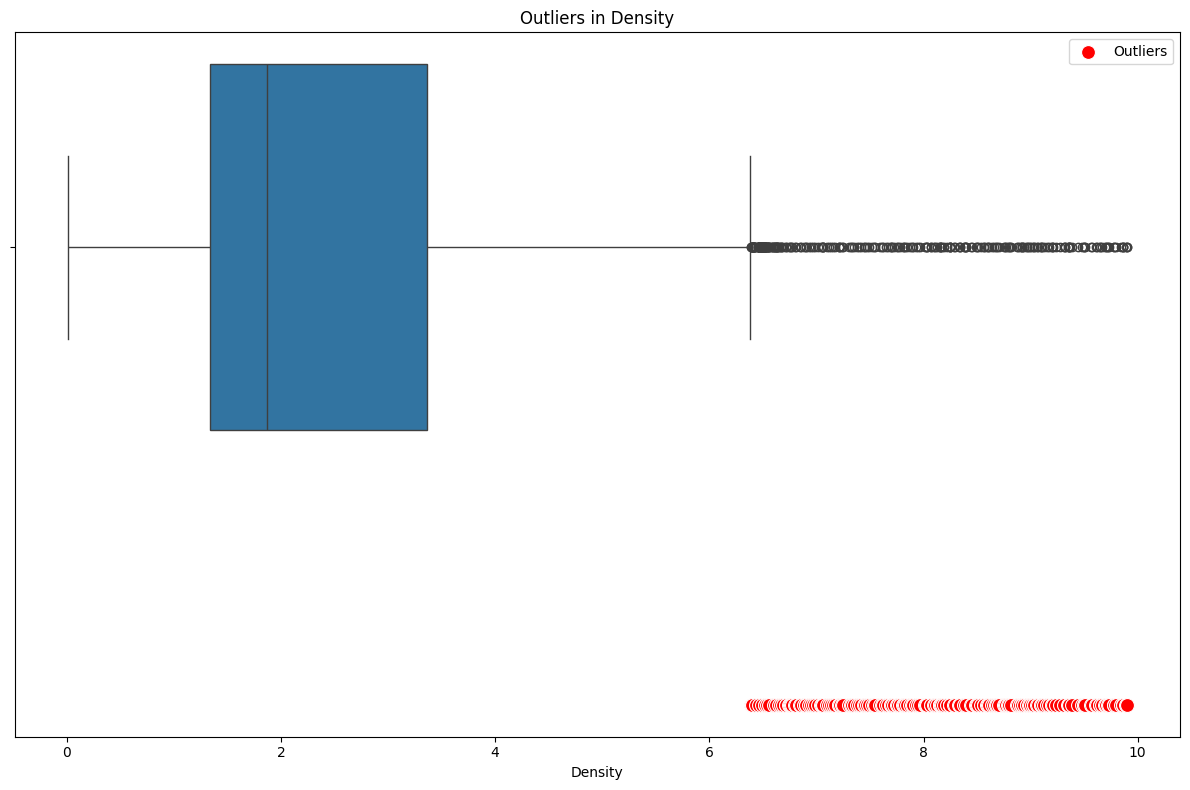

In [ ]:
sensor_columns = ['Density']

# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

IQR Values:
{'Acc': 0.0153}

Outliers:
857
      timestamp       X        Y   Speed  Heading  AgentCount  Density  \
624     0:16:00  0.3495  20.4847  0.9018  88.3933         157     1.57   
699     0:17:15  0.3506  20.5183  0.7720  89.6749         183     1.83   
708     0:17:24  0.3844  20.5947  0.8444  89.9760         187     1.87   
748     0:18:04  0.3045  21.0239  0.8950  88.2255         163     1.63   
749     0:18:05  0.3153  20.7040  0.9082  88.2997         160     1.60   
...         ...     ...      ...     ...      ...         ...      ...   
23511   0:49:03  0.3345  20.8622  1.1506  89.2948         142     1.42   
23533   0:49:25  0.2995  20.9276  1.1693  89.0261         136     1.36   
23557   0:49:49  0.3156  20.6709  1.1337  88.4769         134     1.34   
23561   0:49:53  0.3335  20.9106  1.1244  89.4679         137     1.37   
23566   0:49:58  0.3387  20.5836  1.1565  88.8676         133     1.33   

          Acc  LevelOfCrowdness  label  label2  Severity_level  outl

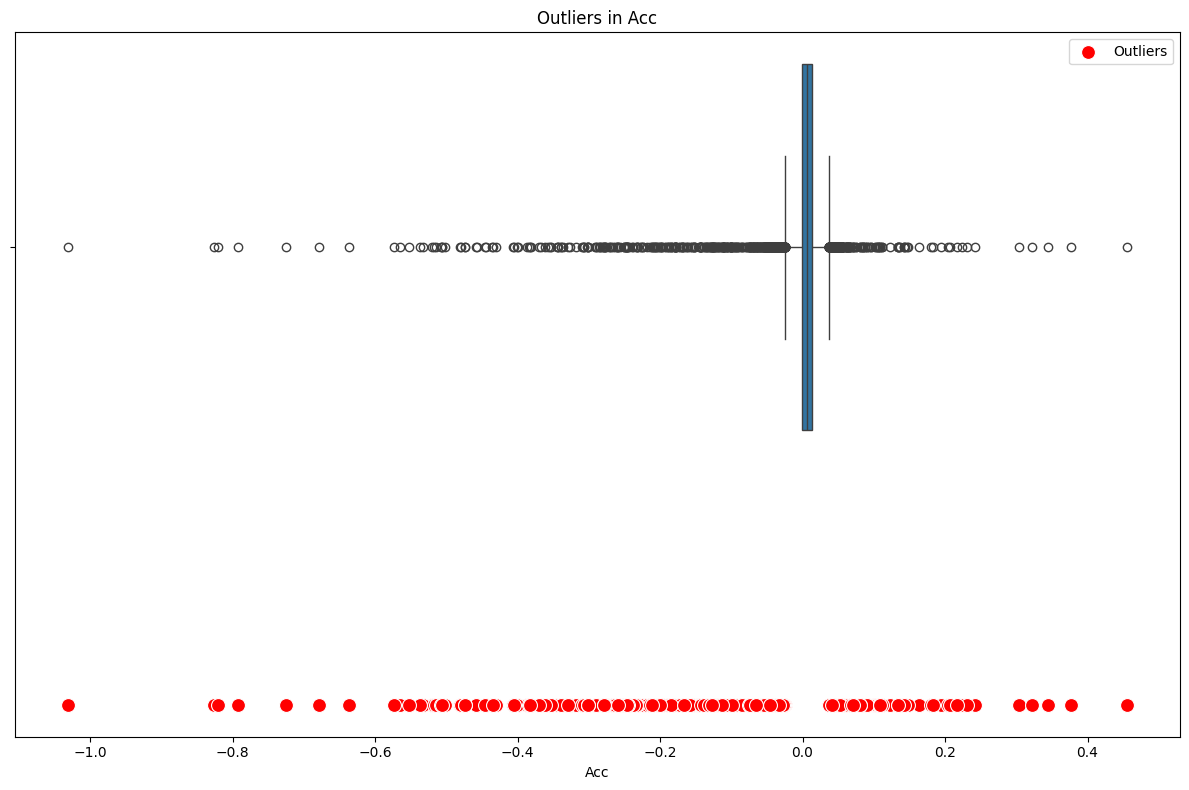

In [ ]:
# List of sensor reading columns
sensor_columns = ['Acc']

# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

IQR Values:
{'LevelOfCrowdness': 2.0}

Outliers:
0
Empty DataFrame
Columns: [timestamp, X, Y, Speed, Heading, AgentCount, Density, Acc, LevelOfCrowdness, label, label2, Severity_level, outlier_lof]
Index: []


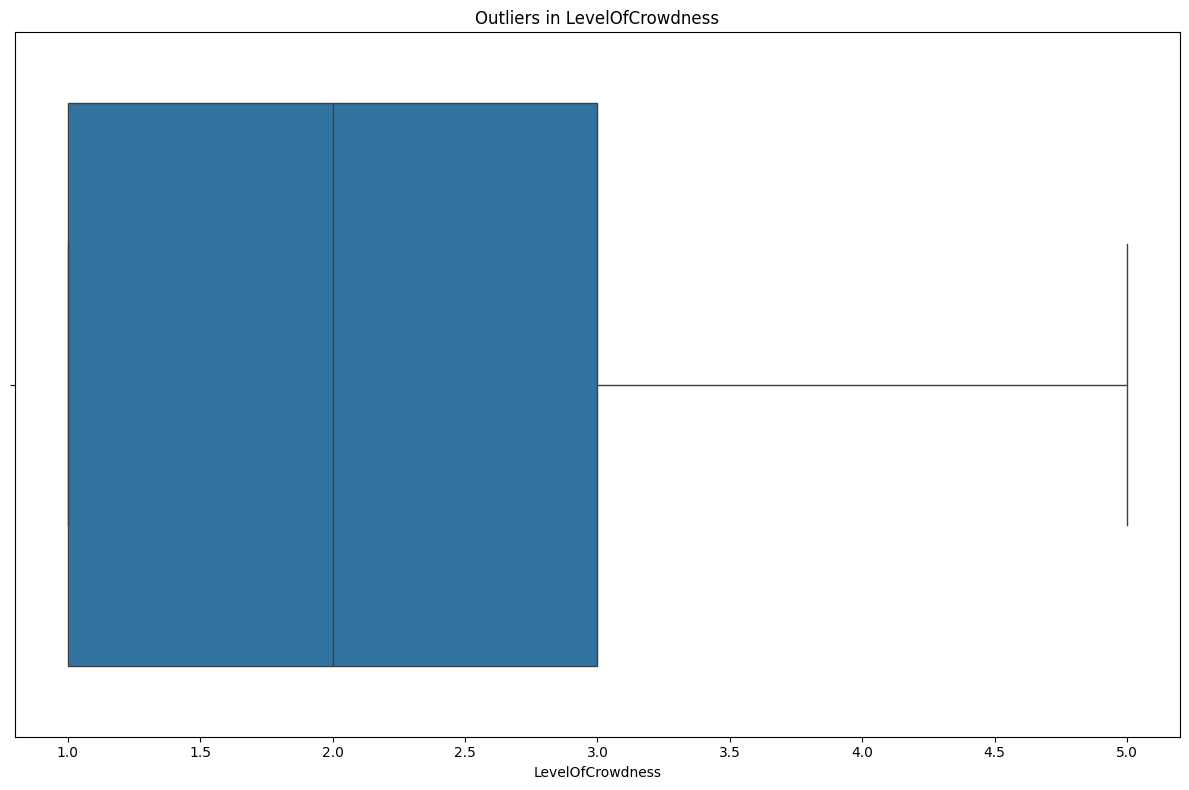

In [ ]:
sensor_columns = ['LevelOfCrowdness']

# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

IQR Values:
{'Severity_level': 1.0}

Outliers:
534
      timestamp       X        Y   Speed   Heading  AgentCount  Density  \
3067    0:56:43  0.2718  21.4688  0.2834  101.3003         401     4.01   
3068    0:56:44  0.2762  21.4441  0.2894   99.8226         403     4.03   
3069    0:56:45  0.2862  21.4480  0.2841   98.9516         404     4.04   
3070    0:56:46  0.2860  21.3002  0.2917   98.0279         409     4.09   
3071    0:56:47  0.2801  21.2719  0.2962   98.2284         410     4.10   
...         ...     ...      ...     ...       ...         ...      ...   
22423   0:59:55  0.2476  20.7841  0.1411  128.1307         986     9.86   
22424   0:59:56  0.2464  20.8038  0.1388  128.6967         986     9.86   
22425   0:59:57  0.2477  20.7936  0.1405  126.7505         989     9.89   
22426   0:59:58  0.2465  20.7839  0.1420  125.6554         990     9.90   
22427   0:59:59  0.2458  20.7864  0.1422  124.1256         990     9.90   

          Acc  LevelOfCrowdness  label   label2 

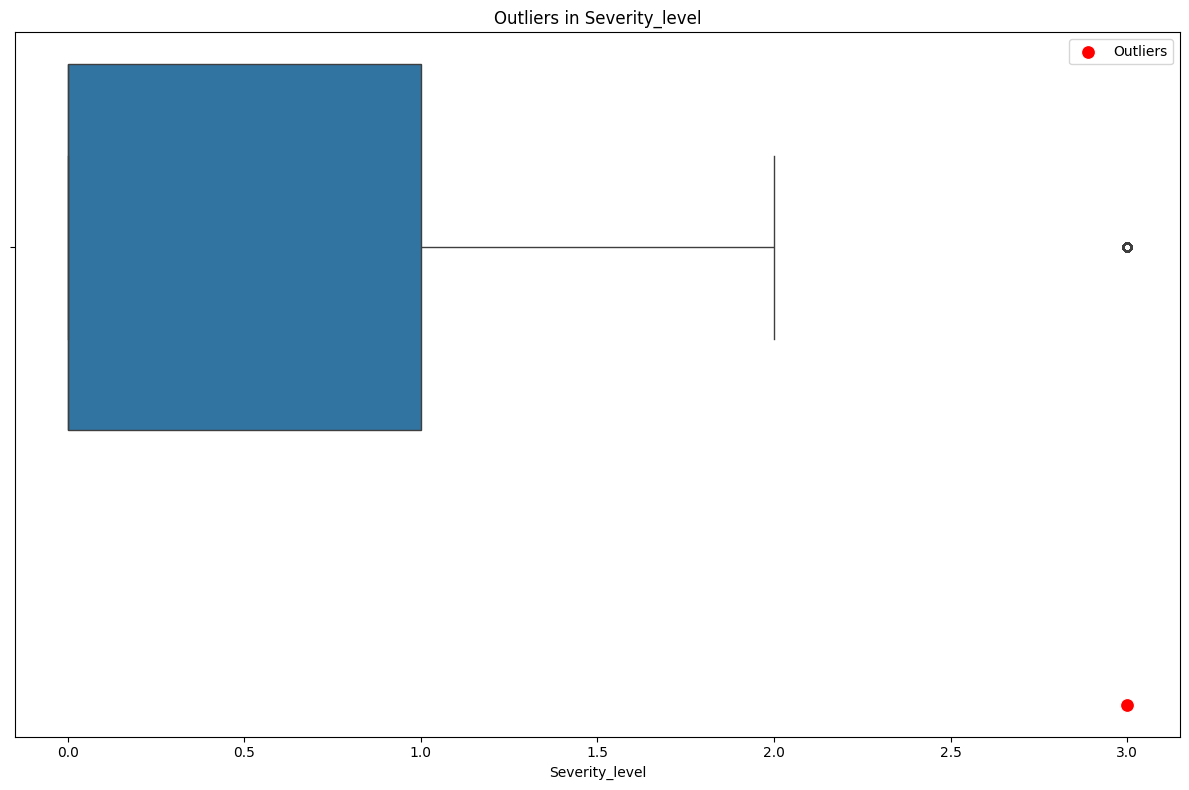

In [ ]:
sensor_columns = ['Severity_level']

# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

IQR Values:
{'X': 0.0923, 'Y': 1.1172000000000004, 'Speed': 0.5092000000000001, 'Heading': 1.3221499999999935, 'AgentCount': 202.0, 'Density': 2.0199999999999996, 'Acc': 0.0153}

Outliers:
6202
      timestamp       X        Y   Speed   Heading  AgentCount  Density  \
2884    0:53:40  0.5134  21.2985  0.7035  102.0650         283     2.83   
2885    0:53:41  0.5183  21.4306  0.7333  103.5605         281     2.81   
2886    0:53:42  0.5083  21.4887  0.7637  105.3477         278     2.78   
2887    0:53:43  0.5070  21.6273  0.8043  106.4613         274     2.74   
4150    0:59:07  0.5301  20.2118  1.0353   91.0069          49     0.49   
...         ...     ...      ...     ...       ...         ...      ...   
23511   0:49:03  0.3345  20.8622  1.1506   89.2948         142     1.42   
23533   0:49:25  0.2995  20.9276  1.1693   89.0261         136     1.36   
23557   0:49:49  0.3156  20.6709  1.1337   88.4769         134     1.34   
23561   0:49:53  0.3335  20.9106  1.1244   89.4679      

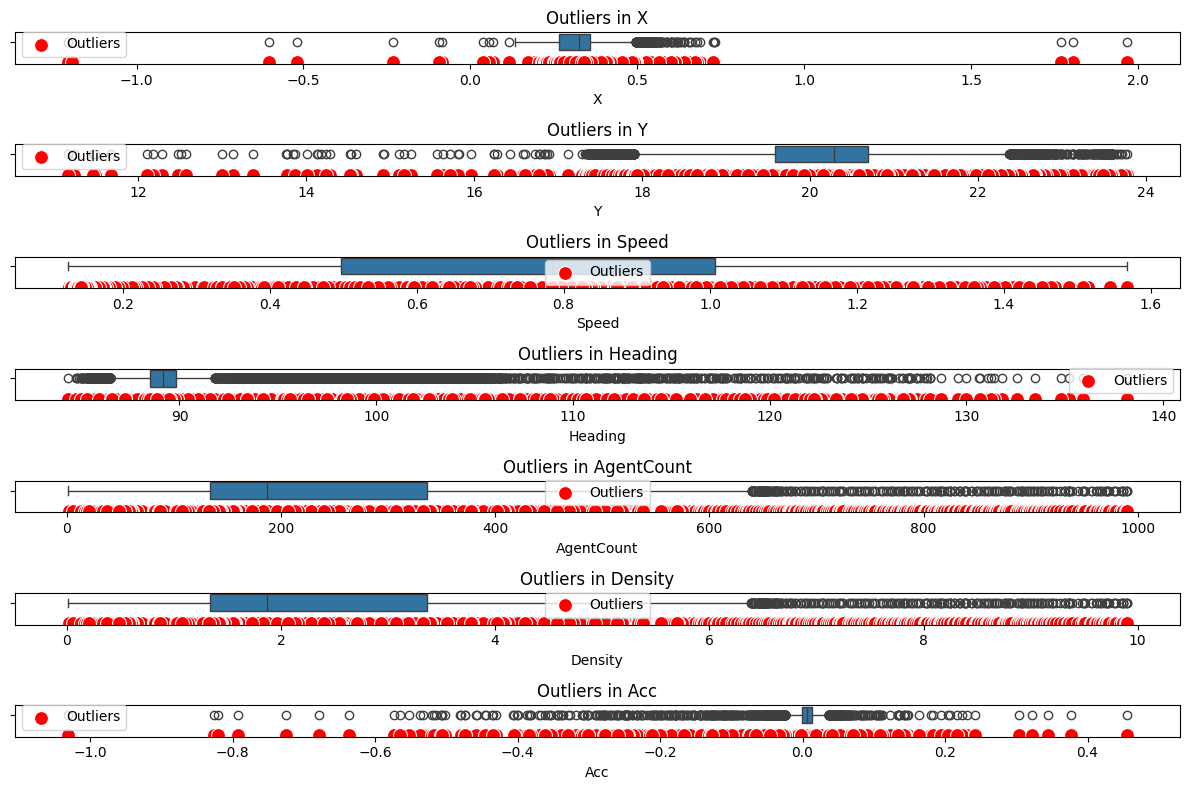

In [ ]:
sensor_columns = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc']
# Function to calculate IQR and identify outliers
def calculate_iqr_and_outliers(df, columns):
    iqr_values = {}
    outliers = pd.DataFrame()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_values[column] = IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return iqr_values, outliers.drop_duplicates()

# Calculate IQR and identify outliers
iqr_values, outliers = calculate_iqr_and_outliers(data, sensor_columns)

print("IQR Values:")
print(iqr_values)

print("\nOutliers:")
print(len(outliers))
print(outliers)
# Plotting potential outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 1, i)
    sns.boxplot(x=data[column])
    sns.scatterplot(x=outliers[column], y=[1]*len(outliers), color='red', label='Outliers', marker='o', s=100)
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Z-score**

In [ ]:
from scipy.stats import zscore
numerical_features = ['X', 'Y', 'Speed', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']
z_scores = data[numerical_features].apply(zscore)

# Display the first few rows of the z-score normalized data
z_scores.head()

,X,Y,Speed,AgentCount,Density,Acc,LevelOfCrowdness,Severity_level
0,1.520675,-0.723185,1.432952,-1.014795,-1.014795,-0.212691,-0.918124,-0.594115
1,0.749318,-0.395174,1.448705,-1.002863,-1.002863,-0.212691,-0.918124,-0.594115
2,1.186075,-0.130874,1.445125,-0.984965,-0.984965,-0.286634,-0.918124,-0.594115
3,0.872202,0.040846,1.464815,-0.973032,-0.973032,-0.157233,-0.918124,-0.594115
4,1.233452,0.392500,1.456939,-0.973032,-0.973032,-0.166476,-0.918124,-0.594115


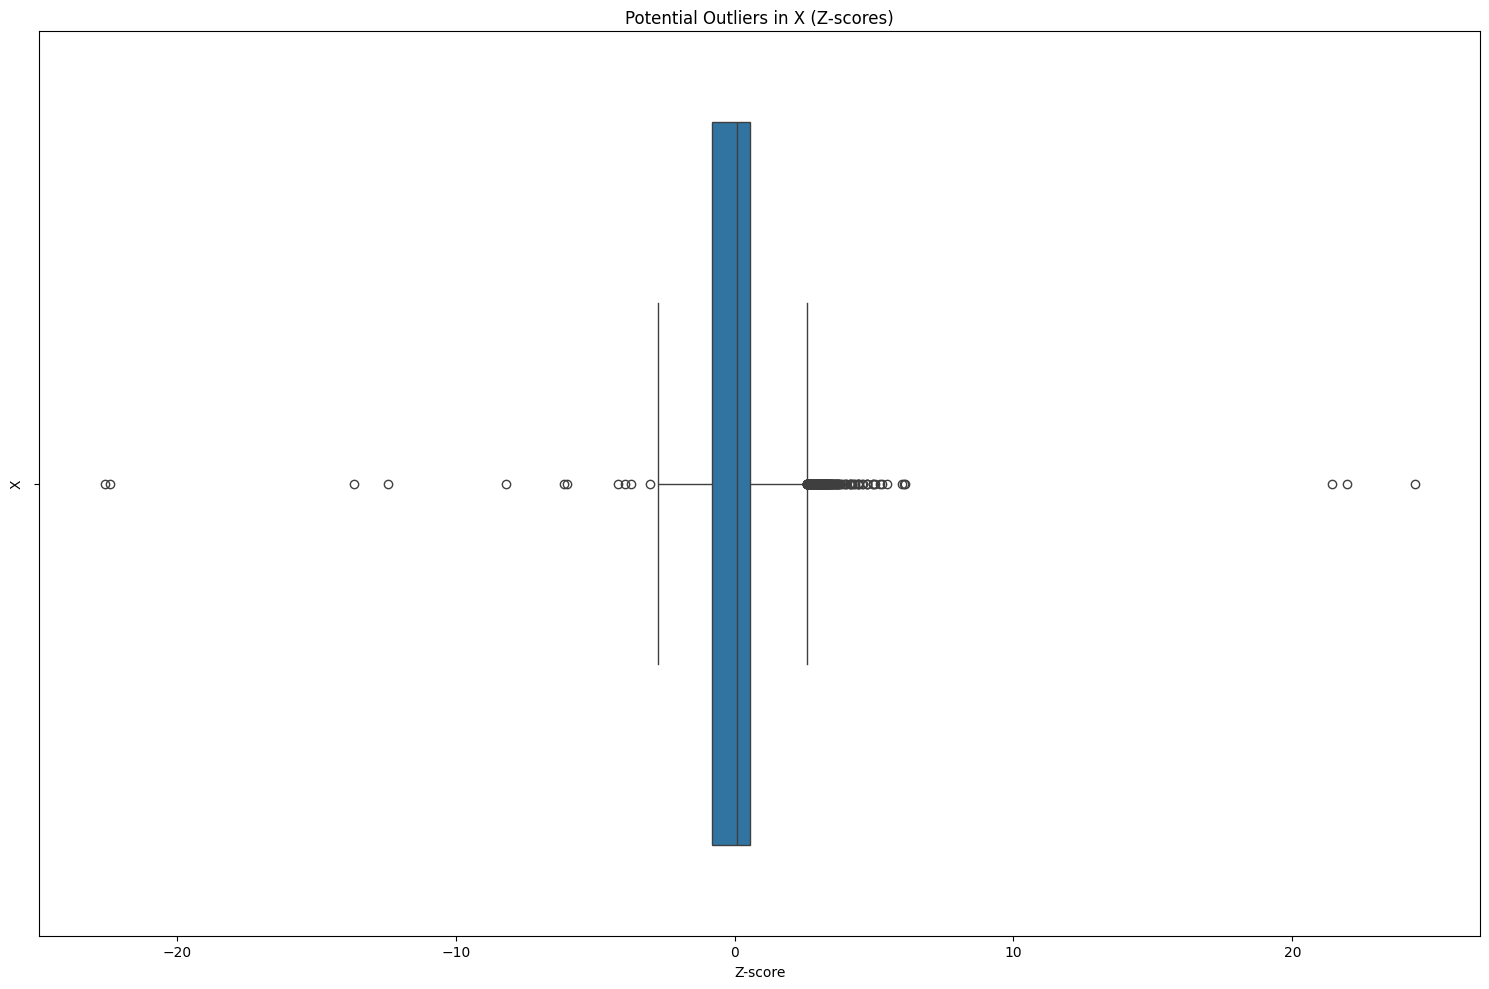

Number of outliers: 300
              X         Y     Speed  AgentCount   Density        Acc  \
1663  -1.111711 -1.594728 -1.377036    1.294103  1.294103   5.856825   
2295  -0.744539 -0.483772 -0.519612    0.440944  0.440944   4.276286   
2401   0.396951  0.479107  0.581972   -0.310790 -0.310790   3.302699   
2720   0.170430  1.481721  0.600947   -0.549436 -0.549436   3.154812   
2967   0.784851  3.059226 -0.753032   -0.161636 -0.161636  -0.178800   
...         ...       ...       ...         ...       ...        ...   
22803 -1.361921 -1.960318 -1.505560    1.705767  1.705767   5.499432   
22866 -1.393012 -1.666237 -1.405318    1.902650  1.902650   4.020565   
23024 -1.336752 -1.731358 -1.255672    1.568546  1.568546   9.797389   
23141 -1.239037 -1.397042 -0.969267    1.085288  1.085288  11.464195   
23291 -0.131599  0.289634  0.040310    0.130705  0.130705   3.207189   

       LevelOfCrowdness  Severity_level  
1663           1.141891        1.739109  
2295           0.455219    

In [ ]:
from itertools import count
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features='X'
# Plotting potential outliers using z-scores
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=z_scores[column])
    plt.title(f'Potential Outliers in {column} (Z-scores)')
    plt.xlabel('Z-score')
    plt.ylabel(column)

plt.tight_layout()
plt.show()
outliers = z_scores[(z_scores > 3 ).any(axis=1)]#+(z_scores < -3 ).any(axis=1)]
count_outliers = outliers.shape[0]
print(f"Number of outliers: {count_outliers}")
print(outliers)


**Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest
import warnings

warnings.filterwarnings('ignore')
numerical_features = ['X', 'Y', 'Speed', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']
X=data[numerical_features]
Y=data['label']
# print(len(Y))
from sklearn.model_selection import train_test_split
#splitting dataset, training=75%, test=25%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
#Training model
model=IsolationForest(contamination=0.3,max_samples=len(X_train))
model.fit(X_train)
#predictions and re-labelling with 0,1 to 1,-1 predictions because in feature Y having only 0,1 values in dataset
y_pred=model.predict(X_test)
# print(len(X_train))
# print(len(Y_test))
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
from sklearn.metrics import accuracy_score
#calculating accuracy score
print(accuracy_score(y_pred,Y_test)*100,"%")
data.head()

81.39612004642679 %


,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level,outlier_lof
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0,1
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0,1
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0,1
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0,1
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0,1


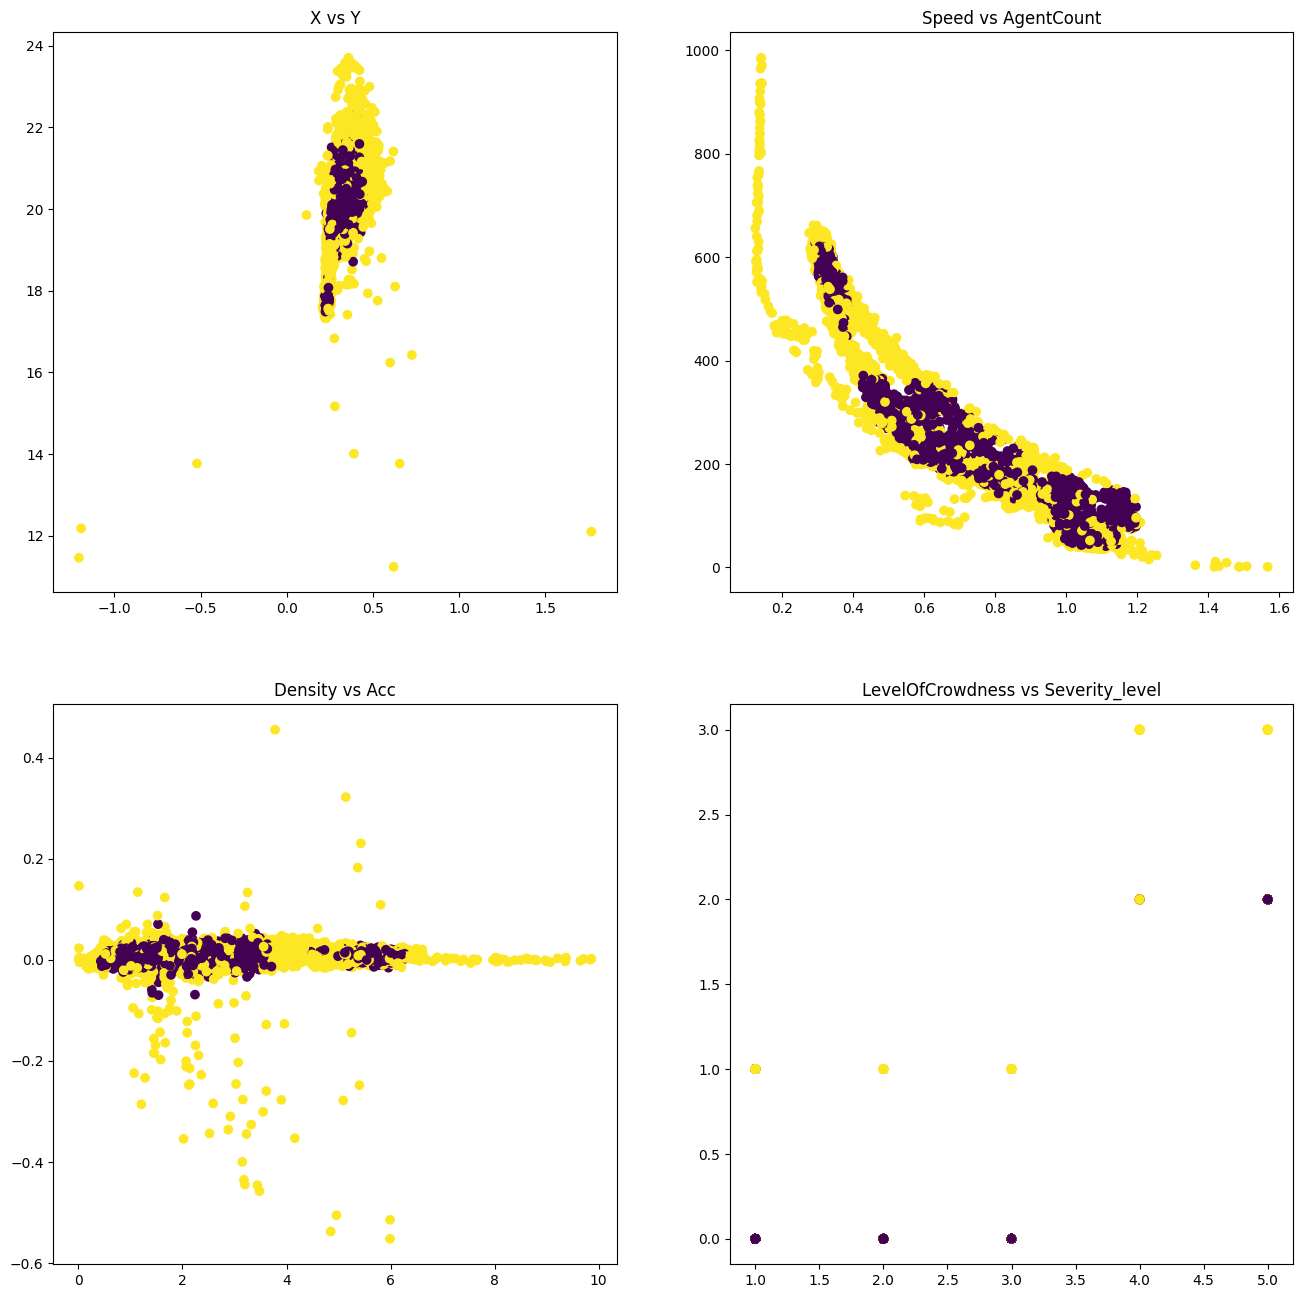

In [ ]:
# prompt: visualizations of anamolies by isolation forest

import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

#Since y_pred is based on the test set, we need to use X_test and Y_test
# Plot the data points for each feature
axes[0, 0].scatter(X_test['X'], X_test['Y'], c=y_pred)
axes[0, 0].set_title('X vs Y')
axes[0, 1].scatter(X_test['Speed'], X_test['AgentCount'], c=y_pred)
axes[0, 1].set_title('Speed vs AgentCount')
axes[1, 0].scatter(X_test['Density'], X_test['Acc'], c=y_pred)
axes[1, 0].set_title('Density vs Acc')
axes[1, 1].scatter(X_test['LevelOfCrowdness'], X_test['Severity_level'], c=y_pred)
axes[1, 1].set_title('LevelOfCrowdness vs Severity_level')

# Show the plot
plt.show()

**Local Outlier**

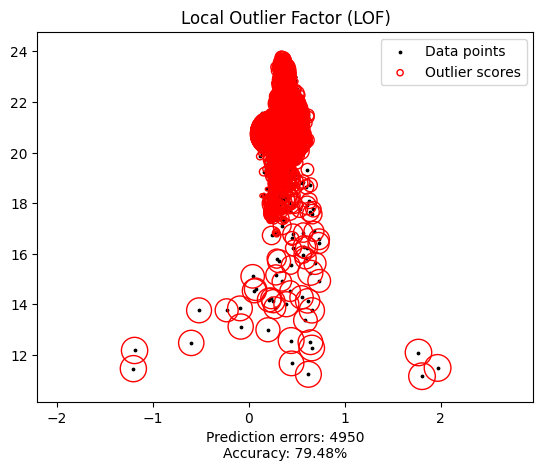

Accuracy: 79.48%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

# Prepare the data (exclude non-numeric and target columns)
features = data.drop(columns=['timestamp', 'label', 'label2', 'Severity_level']).values

# Define ground truth for anomaly detection
ground_truth = data['label'].values

# Fit the LOF model for outlier detection with custom parameters
clf = LocalOutlierFactor(
    n_neighbors=1000,
    algorithm='auto',
    leaf_size=100,
    metric='minkowski',
    p=1,
    contamination=0.1,
    novelty=False,
    n_jobs=-1
)
y_pred = clf.fit_predict(features)

# Convert LOF predictions to match ground truth format (1 for normal, -1 for outlier)
y_pred = np.where(y_pred == 1, 0, 1)

# Compute prediction errors
n_errors = (y_pred != ground_truth).sum()

# Calculate accuracy
accuracy = accuracy_score(ground_truth, y_pred)

# Compute the negative outlier factor (larger negative value means more likely to be an outlier)
X_scores = clf.negative_outlier_factor_

# Plot the results
def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

plt.scatter(features[:, 0], features[:, 1], color="k", s=3.0, label="Data points")
# Plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    features[:, 0],
    features[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((features[:, 0].min() - 1, features[:, 0].max() + 1))
plt.ylim((features[:, 1].min() - 1, features[:, 1].max() + 1))
plt.xlabel(f"Prediction errors: {n_errors}\nAccuracy: {accuracy:.2%}")
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

# Print the accuracy
print(f"Accuracy: {accuracy:.2%}")


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score using y_pred (predictions from LOF model)
precision = precision_score(data['label'], y_pred)
recall = recall_score(data['label'], y_pred)
f1 = f1_score(data['label'], y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

from sklearn.metrics import accuracy_score

# Calculate accuracy (already calculated earlier, but re-printing here for consistency)
accuracy = accuracy_score(data['label'], y_pred)

print(f'Accuracy: {accuracy:.2f}')

Precision: 0.92
Recall: 0.32
F1-score: 0.47
Accuracy: 0.79


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

# Create a copy of the data to simulate anomalies
simulated_data = data.copy()

# Introduce anomalies by randomly altering some values
np.random.seed(42)
anomaly_indices = np.random.choice(len(simulated_data), size=50, replace=False)

# Handle potential NaNs before introducing anomalies
simulated_data['X'] = simulated_data['X'].fillna(simulated_data['X'].mean())  # Or another imputation strategy

simulated_data.loc[anomaly_indices, 'X'] *= 10  # Arbitrary large change to simulate anomaly

# Reapply LOF on the simulated data
simulated_features = simulated_data[['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc']]

# Impute missing values in simulated features before scaling
simulated_features_imputed = imputer.transform(simulated_features) # Use the same imputer from before

simulated_features_scaled = scaler.transform(simulated_features_imputed) # Scale the imputed features
simulated_data['Simulated_LOF_Score'] = lof.fit_predict(simulated_features_scaled)
simulated_data['Simulated_LOF_Anomaly_Score'] = lof.negative_outlier_factor_
simulated_data['Simulated_Anomaly'] = simulated_data['Simulated_LOF_Score'].apply(lambda x: 1 if x == -1 else 0)

# Evaluate on the simulated data
simulated_precision = precision_score(data['label'], simulated_data['Simulated_Anomaly'])
simulated_recall = recall_score(data['label'], simulated_data['Simulated_Anomaly'])
simulated_f1 = f1_score(data['label'], simulated_data['Simulated_Anomaly'])

print(f'Simulated Precision: {simulated_precision:.2f}')
print(f'Simulated Recall: {simulated_recall:.2f}')
print(f'Simulated F1-score: {simulated_f1:.2f}')
from sklearn.metrics import accuracy_score

# Calculate accuracy using y_pred (predictions from LOF model)
accuracy = accuracy_score(data['label'], y_pred)

print(f'Accuracy: {accuracy:.2f}')

def lof_accuracy(y_true, y_pred):
    y_pred = np.where(y_pred == 1, 0, 1)  # Convert LOF predictions to match ground truth format
    return accuracy_score(y_true, y_pred)

scorer = make_scorer(lof_accuracy, greater_is_better=True)
scores = cross_val_score(clf, features, ground_truth, cv=5, scoring=scorer)

# Print cross-validation results
print("Cross-validation accuracies for each fold:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Simulated Precision: 0.44
Simulated Recall: 0.02
Simulated F1-score: 0.03
Accuracy: 0.79
Cross-validation accuracies for each fold: [nan nan nan nan nan]
Mean cross-validation accuracy: nan


Correctly flagged simulated anomalies: 4 out of 10


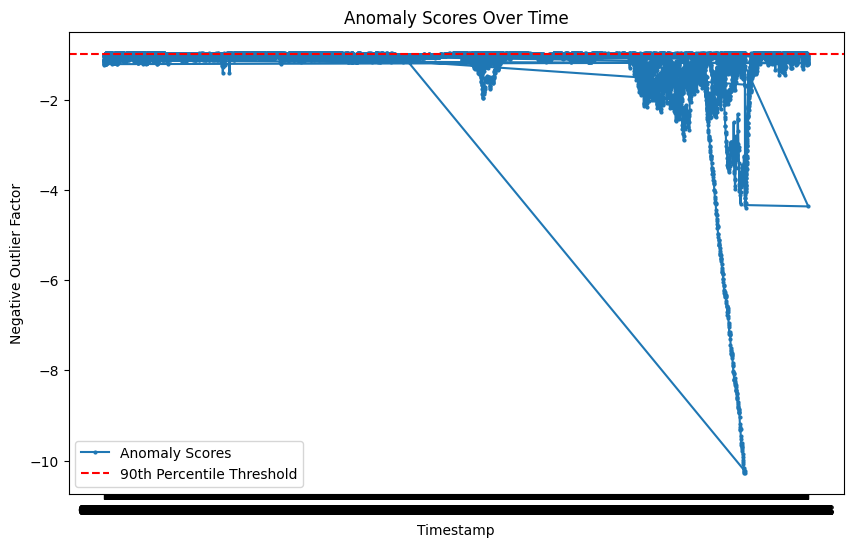

In [ ]:
n_simulate = 10
simulated_anomalies = features.copy()
np.random.seed(42)
anomaly_indices = np.random.choice(len(simulated_anomalies), n_simulate, replace=False)
simulated_anomalies[anomaly_indices] += np.random.normal(0, 1, simulated_anomalies[anomaly_indices].shape)

# Predict on simulated data
y_simulated_pred = clf.fit_predict(simulated_anomalies)
y_simulated_pred = np.where(y_simulated_pred == 1, 0, 1)

# Check how many simulated anomalies were correctly flagged
correct_flags = (y_simulated_pred[anomaly_indices] == 1).sum()
print(f"Correctly flagged simulated anomalies: {correct_flags} out of {n_simulate}")

# Compute the negative outlier factor for visualization
X_scores = clf.negative_outlier_factor_
timestamps = data['timestamp'].values
# Plot anomaly scores against time
plt.figure(figsize=(10, 6))
plt.plot(timestamps, X_scores, marker='o', linestyle='-', markersize=2, label='Anomaly Scores')
plt.axhline(y=np.percentile(X_scores, 90), color='r', linestyle='--', label='90th Percentile Threshold')
plt.xlabel('Timestamp')
plt.ylabel('Negative Outlier Factor')
plt.title('Anomaly Scores Over Time')
plt.legend()
plt.show()